In [22]:
# importamos todas las librerias necesarias
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
from matplotlib import pyplot as plt

In [23]:
# subimos datos del MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# La función mnist.load_data() carga los datos de entrenamiento y prueba del conjunto MNIST
# x_train y x_test contienen las imágenes de entrenamiento y prueba
# y_train y y_test contienen las etiquetas correspondientes a las imágenes

In [24]:
# Normalizar los datos para el rango 0,1
x_train = x_train / 255.0
x_test = x_test / 255.0
# Dividimos por 255.0 ya que los valores originales de los píxeles están en el rango [0, 255]
# Esto ayuda a mejorar el rendimiento del modelo durante el entrenamiento

In [25]:
# Modificamos el formato de las imagenes (28, 28, 1)
# La red espera que las imagenes tengan 3 dimensiones
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [26]:
# Convertir etiquetas a formato one-hot encoding
# Se convierten para que sean vectores binarios
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [27]:
# Definimos los parametros de la red
learning_rate = 0.0001
batch_size = 100
num_epochs = 30

In [28]:
# Modelo, definimos secuencial para crear capa por capa
model = Sequential()
# agregamos las capas con los filtros, tamanios de kernel y de ventana
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# La capa flatten se coloca para convertir las caracteristicas 2D en un vector 1D
model.add(Flatten())
model.add(Dense(128, activation="relu")) #capa densa de 128 neuronas y la funcion ReLU
model.add(Dense(10, activation="softmax"))# capa de salida con 10 neuronas (0 al 9)

In [29]:
# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=learning_rate), # optimizador de aprendizaje Adam de tf
    loss="categorical_crossentropy",# funcion de perdida
    metrics=["accuracy"],
)

In [30]:
# Callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", patience=3), # aqui detenemos el entrenamiento si la perdida no mejora despues de 3 epochs
    ModelCheckpoint("digitos.keras", save_best_only=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2),# Reduce la tasa de aprendizaje despues de 2 epochs de perdida
]

In [31]:
# Entrenamiento del modelo
modelo = model.fit(
    x_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    verbose=2,
    validation_split=0.1,
    callbacks=callbacks,
)

Epoch 1/30
540/540 - 26s - loss: 0.6471 - accuracy: 0.8357 - val_loss: 0.1714 - val_accuracy: 0.9557 - lr: 1.0000e-04 - 26s/epoch - 47ms/step
Epoch 2/30
540/540 - 25s - loss: 0.1670 - accuracy: 0.9511 - val_loss: 0.1068 - val_accuracy: 0.9728 - lr: 1.0000e-04 - 25s/epoch - 47ms/step
Epoch 3/30
540/540 - 26s - loss: 0.1125 - accuracy: 0.9670 - val_loss: 0.0839 - val_accuracy: 0.9752 - lr: 1.0000e-04 - 26s/epoch - 49ms/step
Epoch 4/30
540/540 - 25s - loss: 0.0880 - accuracy: 0.9739 - val_loss: 0.0707 - val_accuracy: 0.9797 - lr: 1.0000e-04 - 25s/epoch - 46ms/step
Epoch 5/30
540/540 - 24s - loss: 0.0735 - accuracy: 0.9776 - val_loss: 0.0664 - val_accuracy: 0.9815 - lr: 1.0000e-04 - 24s/epoch - 45ms/step
Epoch 6/30
540/540 - 25s - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.0620 - val_accuracy: 0.9837 - lr: 1.0000e-04 - 25s/epoch - 46ms/step
Epoch 7/30
540/540 - 24s - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.0557 - val_accuracy: 0.9843 - lr: 1.0000e-04 - 24s/epoch - 45ms/step
Epoch 

In [32]:
# Carga del modelo
model = load_model("digitos.keras") # load_model() carga el modelo guardado en el archivo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) # evaluate() devuelve la perdidad y la precision
print('\nPrecisión en los datos de prueba: {:.2%}'.format(test_acc)) # imprimimos

313/313 - 2s - loss: 0.0327 - accuracy: 0.9892 - 2s/epoch - 5ms/step

Precisión en los datos de prueba: 98.92%


In [33]:
# Predicciones
predictions = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


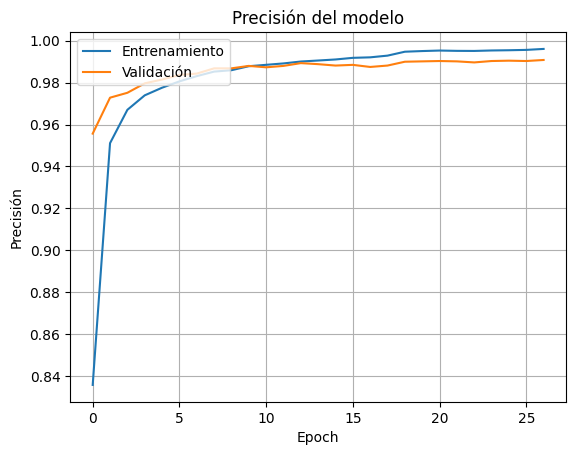

In [34]:
# Gráfica de precisión, el codigo genera una grafica de precision del modelo durante el entrnamiento y la validacion
plt.plot(modelo.history['accuracy'])
plt.plot(modelo.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

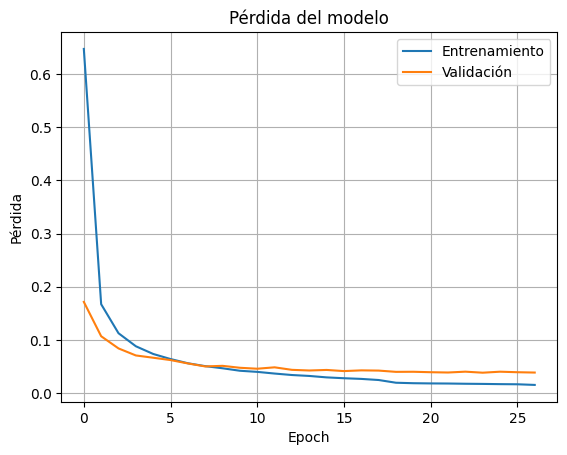

In [35]:
# Gráfica de pérdida del modelo durante el entrenamiento y la validacion
plt.plot(modelo.history['loss'])
plt.plot(modelo.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 24ms/step


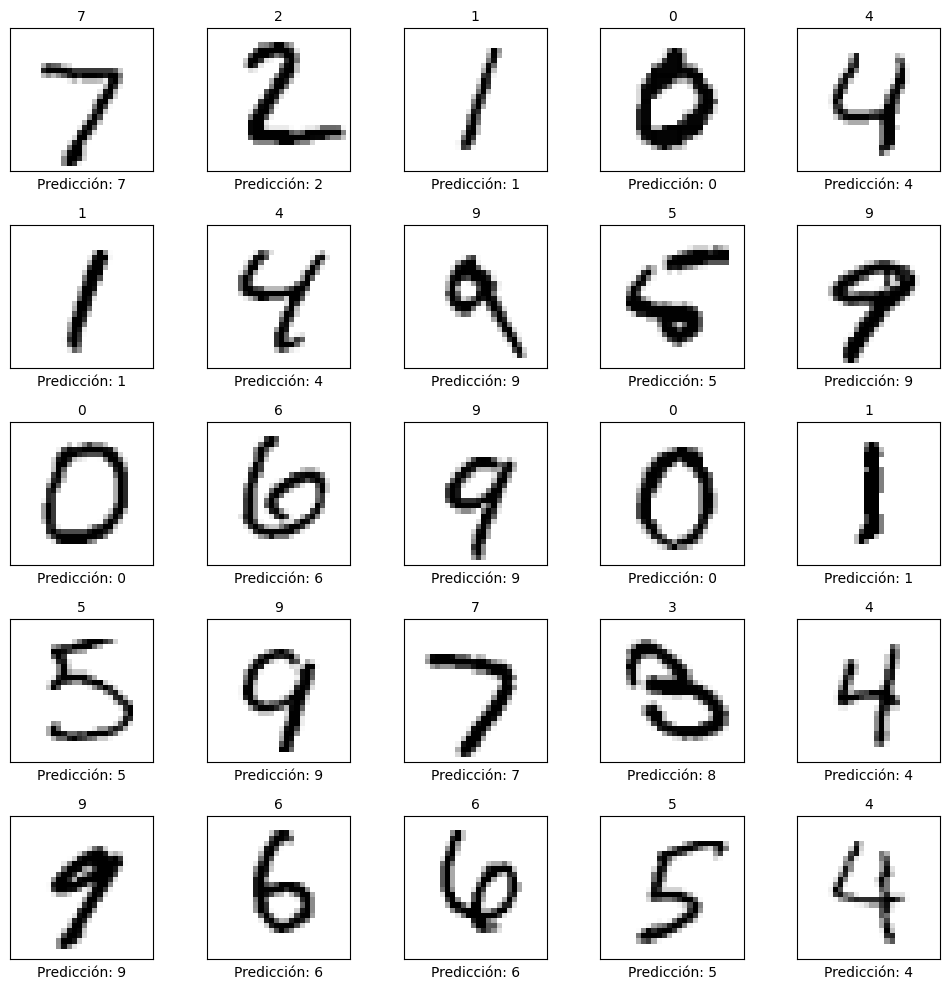

In [36]:
# Visualización de predicciones, imprimimos las predicciones en la imagen segun los datos ingresados
# para poder ver si las predicciones son correctas
plt.figure(figsize=(10, 10))
for i in range(25):
    imagen = x_test[i].reshape((28, 28))
    etiqueta = y_test[i]
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    imagen_expanded = np.expand_dims(x_test[i], 0)
    prediccion = model.predict(imagen_expanded)
    plt.title(str(np.argmax(etiqueta)), fontsize=10)
    plt.xlabel('Predicción: ' + str(np.argmax(prediccion)), fontsize=10)

plt.tight_layout()
plt.show()